## Coding Exercise LDA-1

#####  LDA - Linear Discriminant Analysis using the Scikit-learn library on the Iris dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names, data=iris.data)
dataset['target'] = iris.target

In [10]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [28]:
# Standardizes the features to ensure they have a mean of 0 and a standard deviation of 1 removing the influence of different scales.
# Standardizes the feature data by applying the transformation learned from the training data ensuring each feature contributes equally.
sc = StandardScaler()
X = sc.fit_transform(X)

In [32]:
# Converts categorical labels into numerical values that machine learning models can process.
# Transforms the target labels into numerical values for use in classification models.
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Reduces the dimensionality of the data by projecting it into a lower-dimensional space while maximizing the separation between classes.
# Applies the learned LDA transformation to the test data to maintain consistency with the training data.
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

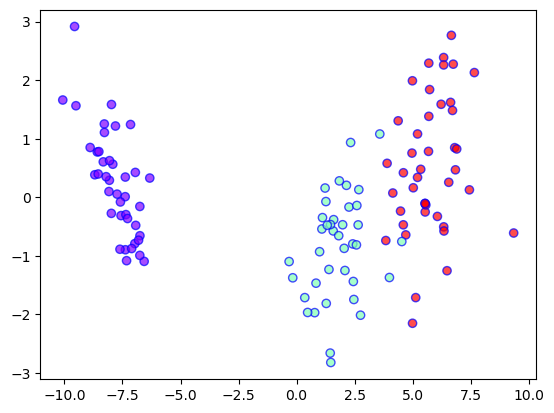

In [36]:
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)

In [38]:
# Applies Random Forest to the new X_train and X_test samples
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [24]:
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 1.0
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
